<a href="https://colab.research.google.com/github/NuryaFahruRosyidin2406/Dicoding_Learn-ML/blob/main/First_project_Modeling_NLP_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Dataset yang saya pakai diambil dari kaggle yang miliki judul 'Ecommerce Text Classification'
# Link untuk dataset-nya https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification/data

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ecommerceDataset.csv', header = None)

df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [24]:
df

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [25]:
df.columns = ['label','text']
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [26]:
## null values
df.isnull().sum()

label    0
text     1
dtype: int64

In [27]:
## is duplicates
df.duplicated().sum()

22622

In [28]:
## descriptive statistics
df.describe()

,label,text
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [29]:
# drop null values
df.dropna(inplace=True)

In [30]:
# drop duplicates
df.drop_duplicates(inplace=True)

<ipython-input-31-642352994a77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Blues')


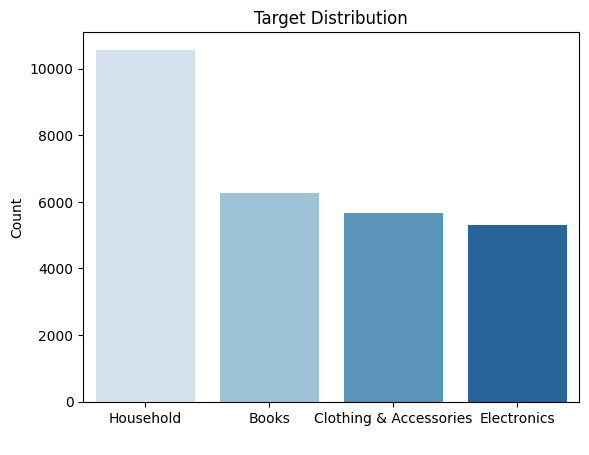

In [31]:
## distribution of label in dataset
sns.countplot(x='label', data=df, palette='Blues')
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [32]:
# import numpy as np

# Get random sample of 10.000 data
sampled_df = df.sample(n=1500, random_state=42)

sampled_df

,label,text
45291,Electronics,Canon EOS 1500D Digital SLR Camera (Black) wit...
13935,Household,NIRVA Electric Automatic Yogurt Maker 1L Elect...
14087,Household,SHOPTOSHOP Plastic Lint Cum Fuzz Remover for A...
37435,Clothing & Accessories,Claura Women's Satin Pack of 6pc Night Dress {...
40502,Electronics,Trishago Head Cable with CR Sensor for Epson P...
...,...,...
22558,Books,B. Pharm (Bachelor of Pharmacy) Entrance Exam ...
12858,Household,Glen SA-3034 615-Watt Bread Maker (Grey) 2 yea...
11786,Household,"Herevin Venezia Butter and Cheese Dish, Purple..."
33455,Clothing & Accessories,SINIMINI Girls Printed Pretty Capri (Pack of 2...


In [33]:
# Display 5 rows
sampled_df.head()

,label,text
45291,Electronics,Canon EOS 1500D Digital SLR Camera (Black) wit...
13935,Household,NIRVA Electric Automatic Yogurt Maker 1L Elect...
14087,Household,SHOPTOSHOP Plastic Lint Cum Fuzz Remover for A...
37435,Clothing & Accessories,Claura Women's Satin Pack of 6pc Night Dress {...
40502,Electronics,Trishago Head Cable with CR Sensor for Epson P...


In [34]:
# Perform the one-hot-encoding process
category = pd.get_dummies(sampled_df.label)
df_baru = pd.concat([sampled_df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,text,Books,Clothing & Accessories,Electronics,Household
45291,Canon EOS 1500D Digital SLR Camera (Black) wit...,0,0,1,0
13935,NIRVA Electric Automatic Yogurt Maker 1L Elect...,0,0,0,1
14087,SHOPTOSHOP Plastic Lint Cum Fuzz Remover for A...,0,0,0,1
37435,Claura Women's Satin Pack of 6pc Night Dress {...,0,1,0,0
40502,Trishago Head Cable with CR Sensor for Epson P...,0,0,1,0
...,...,...,...,...,...
22558,B. Pharm (Bachelor of Pharmacy) Entrance Exam ...,1,0,0,0
12858,Glen SA-3034 615-Watt Bread Maker (Grey) 2 yea...,0,0,0,1
11786,"Herevin Venezia Butter and Cheese Dish, Purple...",0,0,0,1
33455,SINIMINI Girls Printed Pretty Capri (Pack of 2...,0,1,0,0


In [35]:
text = df_baru['text'].values
label = df_baru[['Household', 'Books', 'Clothing & Accessories', 'Electronics']].values

In [36]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [38]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nAkurasi telah mencapai >97%!")
      self.model.stop_training = True

callbacks = myCallback()

In [40]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/50
38/38 - 72s - loss: 1.3459 - accuracy: 0.3850 - val_loss: 1.3264 - val_accuracy: 0.3867 - 72s/epoch - 2s/step
Epoch 2/50
38/38 - 67s - loss: 1.1542 - accuracy: 0.5025 - val_loss: 1.1864 - val_accuracy: 0.4967 - 67s/epoch - 2s/step
Epoch 3/50
38/38 - 69s - loss: 0.8289 - accuracy: 0.6117 - val_loss: 1.0342 - val_accuracy: 0.6167 - 69s/epoch - 2s/step
Epoch 4/50
38/38 - 68s - loss: 0.5432 - accuracy: 0.8075 - val_loss: 0.8898 - val_accuracy: 0.7033 - 68s/epoch - 2s/step
Epoch 5/50
38/38 - 68s - loss: 0.2813 - accuracy: 0.9125 - val_loss: 1.0098 - val_accuracy: 0.7067 - 68s/epoch - 2s/step
Epoch 6/50
38/38 - 69s - loss: 0.1528 - accuracy: 0.9475 - val_loss: 1.0810 - val_accuracy: 0.6833 - 69s/epoch - 2s/step
Epoch 7/50

Akurasi telah mencapai >97%!
38/38 - 68s - loss: 0.0722 - accuracy: 0.9800 - val_loss: 1.2019 - val_accuracy: 0.7433 - 68s/epoch - 2s/step


Membuat plot akurasi dari model

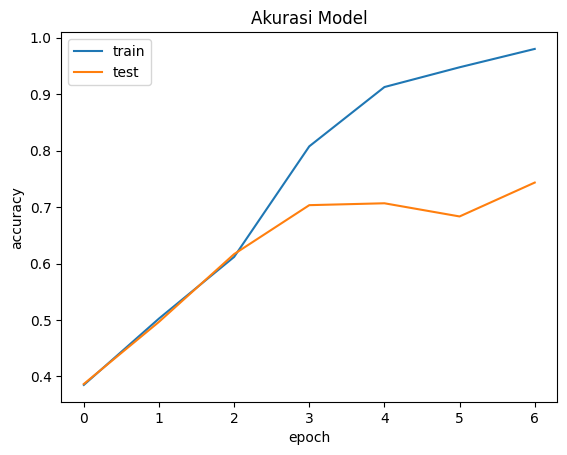

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Membuat plot loss dari model

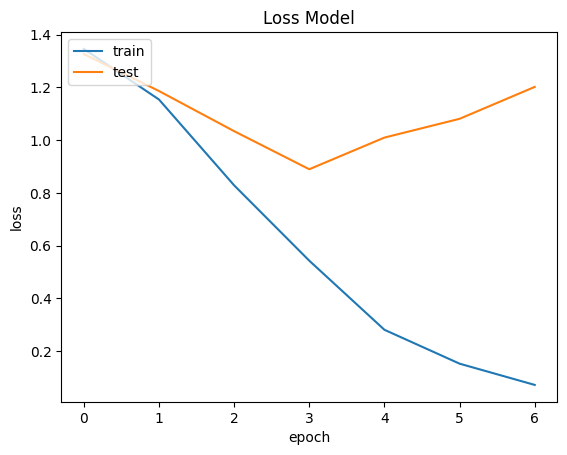

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()